In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits

In [2]:
#Setting the IBM provider
api_file = "../../../ibm_API_key"
with open(api_file, "r") as f:
        api_key = f.readline().strip()
provider = IBMProvider(api_key, instance='ibm-q-ncsu/nc-state/quantum-compiler')
backend = provider.get_backend('ibmq_mumbai')

In [3]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

/Users/amey/anaconda3/envs/simuq/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend.py:447: UserWarning: The backend ibmq_mumbai is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


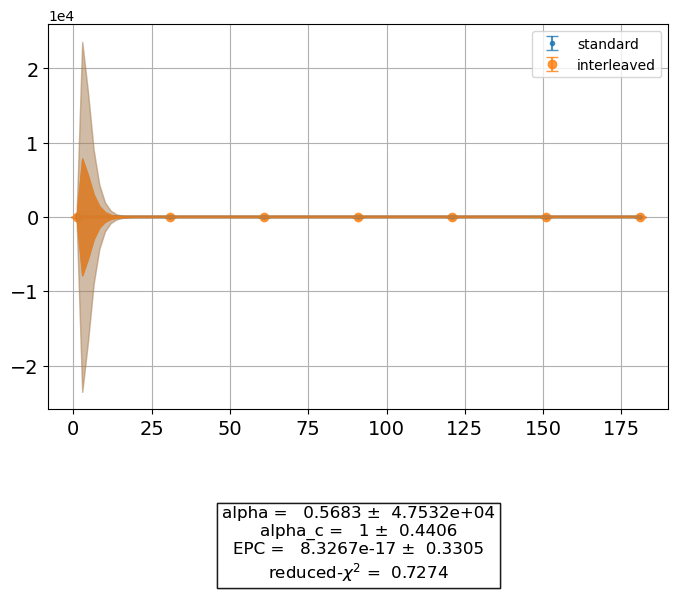

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 122
 - degree of freedom: 10
 - chi-square: 7.274112115238115
 - reduced chi-square: 0.7274112115238115
 - Akaike info crit.: -1.166297980298241
 - Bayesian info crit.: 1.3899313381627927
 - init params:
  * a = 0.14984598254695392
  * alpha = 0.9406292519583064
  * b = 0.25
  * alpha_c = 1.0
 - fit params:
  * a = 0.25381811150860184 ± 21230.110493991007
  * alpha = 0.5682721562547768 ± 47531.99633819545
  * b = 0.25266057858785884 ± 0.0033976036903988222
  * alpha_c = 0.9999999999999999 ± 0.44062893814696713
 - correlations:
  * (a, alpha) = -0.9999999999906322
  * (alpha, b) = -0.21837283763515028
  * (alpha, alpha_c) = -0.0012450542417506213
  * (b, alpha_c) = 0.000270917383996291
  * (a, alpha_c) = 0.0012

In [4]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)